In [2]:
%run ../../main.py
%run ./CAR_creation.ipynb

In [3]:
import pyarc.qcba as qcba
from pyarc import CBA
import pyarc.utils.plotting as plotils

In [4]:
from pyarc.qcba.data_structures import *
from pyarc.qcba import *

quant_rules = [ QuantitativeCAR(r) for r in rules ]
rules

[CAR {a-list-celebrities=<0;2)} => {class=box-office-bomb} sup: 0.31 conf: 1.00 len: 2, id: 89,
 CAR {estimated-budget=<250;300)} => {class=main-stream-hit} sup: 0.06 conf: 1.00 len: 2, id: 51,
 CAR {a-list-celebrities=<4;6),estimated-budget=<0;50)} => {class=critical-success} sup: 0.06 conf: 1.00 len: 3, id: 71,
 CAR {a-list-celebrities=<6;8)} => {class=critical-success} sup: 0.03 conf: 1.00 len: 2, id: 48,
 CAR {a-list-celebrities=<4;6),estimated-budget=<100;150)} => {class=main-stream-hit} sup: 0.03 conf: 1.00 len: 3, id: 57,
 CAR {a-list-celebrities=<4;6),estimated-budget=<150;200)} => {class=main-stream-hit} sup: 0.03 conf: 1.00 len: 3, id: 63,
 CAR {estimated-budget=<200;250)} => {class=box-office-bomb} sup: 0.06 conf: 0.67 len: 2, id: 56,
 CAR {estimated-budget=<0;50)} => {class=box-office-bomb} sup: 0.14 conf: 0.62 len: 2, id: 76,
 CAR {a-list-celebrities=<4;6)} => {class=main-stream-hit} sup: 0.11 conf: 0.50 len: 2, id: 78]

In [5]:
ds = movies_train_undiscr.reset_index()
quant_dataset = QuantitativeDataFrame(ds)
Y = ds["class"]
quant_dataset.dataframe.head()

,estimated-budget,a-list-celebrities,class
0,160,1,box-office-bomb
1,55,2,box-office-bomb
2,78,1,box-office-bomb
3,66,3,box-office-bomb
4,223,2,box-office-bomb


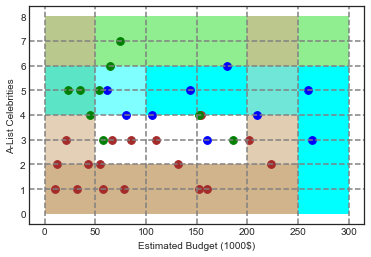

In [6]:
utils.plot_quant_rules(quant_rules)

In [7]:
from pyarc.qcba.transformation import *


qcba_transformation = QCBATransformation(quant_dataset)

In [8]:
quant_dataset.dataframe["estimated-budget"]#.column("estimated-budget")
quant_dataset._QuantitativeDataFrame__preprocessed_columns


{'a-list-celebrities': array([1, 2, 3, 4, 5, 6, 7]),
 'class': array(['box-office-bomb', 'critical-success', 'main-stream-hit'], 
       dtype='<U16'),
 'estimated-budget': array([ 10,  12,  21,  23,  32,  35,  43,  45,  54,  55,  58,  62,  65,
         66,  74,  78,  80,  85, 106, 110, 132, 143, 152, 154, 160, 180,
        186, 202, 209, 223, 260, 264])}

In [9]:
transformed_rules, def_class = qcba_transformation.transform(quant_rules)

# Full qCBA transformation

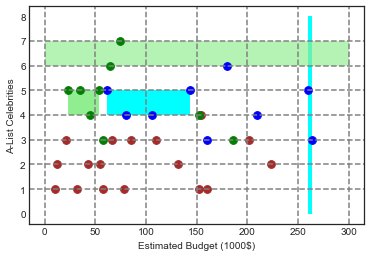

In [10]:
plotils.plot_quant_rules(transformed_rules)

In [11]:
clf = QuantitativeClassifier(transformed_rules, def_class)


clf.rule_model_accuracy(quant_dataset, Y), rm.rule_model_accuracy(movies_discr_txns)

(0.82857142857142863, 0.6857142857142857)

# Step by step transformation

## Refitting

In [12]:
refitted_rules = qcba_transformation.refitter.transform(quant_rules)

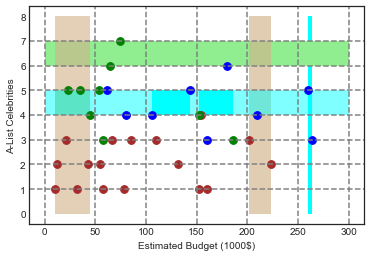

In [13]:
plotils.plot_quant_rules(refitted_rules)

## Literal pruning

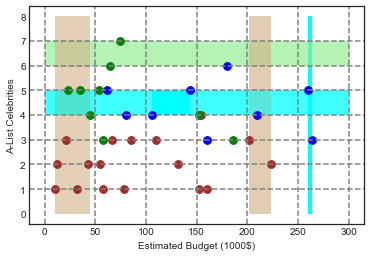

In [14]:
literal_pruned_rules = qcba_transformation.literal_pruner.transform(refitted_rules)

plotils.plot_quant_rules(literal_pruned_rules)

## Trimming

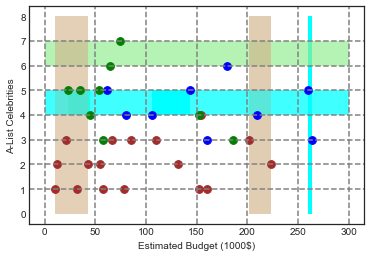

In [15]:
trimmed_rules = qcba_transformation.trimmer.transform(literal_pruned_rules)

plotils.plot_quant_rules(trimmed_rules)

## Extension

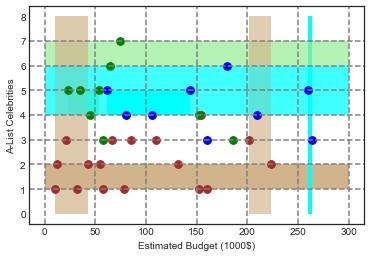

In [16]:
extended_rules = qcba_transformation.extender.transform(trimmed_rules)

plotils.plot_quant_rules(extended_rules)

In [17]:
len(quant_dataset.dataframe) * extended_rules[4].support

4.0

In [18]:
 
quant_dataset.dataframe[np.array(ds["estimated-budget"] >= 10) & np.array(ds["estimated-budget"] <= 43)]



,estimated-budget,a-list-celebrities,class
6,10,1,box-office-bomb
10,32,1,box-office-bomb
12,43,2,box-office-bomb
14,21,3,box-office-bomb
15,12,2,box-office-bomb
28,35,5,critical-success
34,23,5,critical-success


In [19]:
sorted(extended_rules, reverse=True)

[CAR {a-list-celebrities=<1;2>} => {class=box-office-bomb} sup: 0.31 conf: 1.00 len: 2, id: 89,
 CAR {a-list-celebrities=<4;5>,estimated-budget=<62;143>} => {class=main-stream-hit} sup: 0.11 conf: 1.00 len: 3, id: 57,
 CAR {a-list-celebrities=<4;5>,estimated-budget=<23;54>} => {class=critical-success} sup: 0.11 conf: 1.00 len: 3, id: 71,
 CAR {estimated-budget=<260;264>} => {class=main-stream-hit} sup: 0.06 conf: 1.00 len: 2, id: 51,
 CAR {estimated-budget=<10;43>} => {class=box-office-bomb} sup: 0.20 conf: 0.71 len: 2, id: 76,
 CAR {a-list-celebrities=<6;7>} => {class=critical-success} sup: 0.09 conf: 0.67 len: 2, id: 48,
 CAR {estimated-budget=<202;223>} => {class=box-office-bomb} sup: 0.09 conf: 0.67 len: 2, id: 56,
 CAR {a-list-celebrities=<4;6>} => {class=main-stream-hit} sup: 0.40 conf: 0.50 len: 2, id: 63,
 CAR {a-list-celebrities=<4;6>} => {class=main-stream-hit} sup: 0.40 conf: 0.50 len: 2, id: 78]

In [20]:

rules = extended_rules[:-1]

dataset = qcba_transformation.post_pruner.preprocess_dataframe()
dataset_len = dataset.size
# True if datacase is not covered yet
dataset_mask = [ True ] * dataset_len

cutoff_rule = None
cutoff_class, cutoff_class_count = qcba_transformation.post_pruner.get_most_frequent_class()

default_class = cutoff_class

total_errors_without_default = 0

lowest_total_error = dataset_len - cutoff_class_count

# implement comparators
rules.sort(reverse=True)


for rule in rules:
    print("=============\nnew iteration")
    print(rule)
    print("----------------------------")
    covered_antecedent, covered_consequent = qcba_transformation.post_pruner._RulePostPruner__dataframe.find_covered_by_rule_mask(rule)


    # dataset -= covered_antecedent
    #dataset_mask = dataset_mask & np.logical_not(covered_antecedent)

    correctly_covered = covered_antecedent & covered_consequent

    #print("correctly covered from mask", np.sum(correctly_covered & dataset_mask))

    if not any(correctly_covered):
        rules.remove(rule)
    else:
        misclassified = np.sum(covered_antecedent & dataset_mask) - np.sum(correctly_covered & dataset_mask)
        print("misclassified", misclassified)

        total_errors_without_default += misclassified
        print("total_errors_without_default", total_errors_without_default)

        # dataset -= covered_antecedent
        #dataset_mask = np.logical_not(dataset_mask & covered_antecedent)
        dataset_mask = dataset_mask & np.logical_not(covered_antecedent)

        print("remaining to classify", np.sum(dataset_mask))
            
        modified_dataset = dataset[dataset_mask]
        class_values = qcba_transformation.post_pruner._RulePostPruner__dataframe.dataframe.iloc[:,-1][dataset_mask].values

        default_class, default_class_count = qcba_transformation.post_pruner.get_most_frequent_from_numpy(class_values)
        
        
        # don't forget to update dataset length
        default_rule_error = np.sum(dataset_mask) - default_class_count
        
        print("default_rule_error", default_rule_error)
        print("default class", default_class)
        
        total_errors_with_default = default_rule_error + total_errors_without_default
        print("total_errors_with_default", total_errors_with_default)


        if total_errors_with_default < lowest_total_error:
            cutoff_rule = rule
            lowest_total_error = total_errors_with_default
            cutoff_class = default_class





    # remove all rules below cutoff rule
    index_to_cut = rules.index(cutoff_rule)
    rules_pruned = rules[:index_to_cut+1]

    # append new default rule
    empty_rule = cutoff_rule.copy()
    empty_rule.antecedent = []
    empty_rule.consequent = qcba_transformation.post_pruner._RulePostPruner__dataframe.dataframe.columns[-1], cutoff_class


    #rules_pruned.append(empty_rule)
        
rules_pruned, cutoff_class

new iteration
CAR {a-list-celebrities=<1;2>} => {class=box-office-bomb} sup: 0.31 conf: 1.00 len: 2, id: 89
----------------------------
misclassified 0
total_errors_without_default 0
remaining to classify 24
default_rule_error 15
default class critical-success
total_errors_with_default 15
new iteration
CAR {a-list-celebrities=<4;5>,estimated-budget=<62;143>} => {class=main-stream-hit} sup: 0.11 conf: 1.00 len: 3, id: 57
----------------------------
misclassified 0
total_errors_without_default 0
remaining to classify 20
default_rule_error 11
default class critical-success
total_errors_with_default 11
new iteration
CAR {a-list-celebrities=<4;5>,estimated-budget=<23;54>} => {class=critical-success} sup: 0.11 conf: 1.00 len: 3, id: 71
----------------------------
misclassified 0
total_errors_without_default 0
remaining to classify 16
default_rule_error 10
default class box-office-bomb
total_errors_with_default 10
new iteration
CAR {estimated-budget=<260;264>} => {class=main-stream-hit} su

([CAR {a-list-celebrities=<1;2>} => {class=box-office-bomb} sup: 0.31 conf: 1.00 len: 2, id: 89,
  CAR {a-list-celebrities=<4;5>,estimated-budget=<62;143>} => {class=main-stream-hit} sup: 0.11 conf: 1.00 len: 3, id: 57,
  CAR {a-list-celebrities=<4;5>,estimated-budget=<23;54>} => {class=critical-success} sup: 0.11 conf: 1.00 len: 3, id: 71,
  CAR {estimated-budget=<260;264>} => {class=main-stream-hit} sup: 0.06 conf: 1.00 len: 2, id: 51,
  CAR {estimated-budget=<10;43>} => {class=box-office-bomb} sup: 0.20 conf: 0.71 len: 2, id: 76,
  CAR {a-list-celebrities=<6;7>} => {class=critical-success} sup: 0.09 conf: 0.67 len: 2, id: 48],
 'box-office-bomb')

## Postpruning

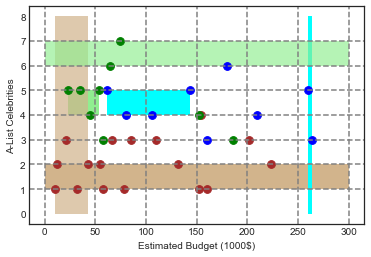

In [21]:
pruned_rules, default_class = qcba_transformation.post_pruner.transform(extended_rules)

plotils.plot_quant_rules(pruned_rules)

In [22]:
q_clf1 = QuantitativeClassifier(extended_rules, default_class)
q_clf2 = QuantitativeClassifier(pruned_rules, default_class)

q_clf1.rule_model_accuracy(quant_dataset, Y), q_clf2.rule_model_accuracy(quant_dataset, Y)

(0.82857142857142863, 0.82857142857142863)

(35.0, 1.0, 0.4857142857142857)

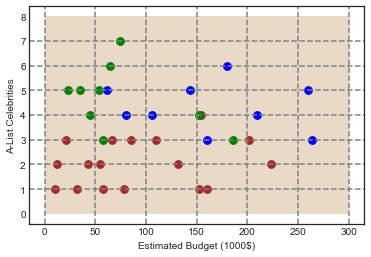

In [25]:
default_rule = extended_rules[0].copy()
default_rule.antecedent = [
    ("a-list-celebrities", Interval(0, 8, True, True)),
    ("estimated-budget", Interval(0, 300, True, True))
]
default_rule.consequent = ("class", default_class)
default_rule.update_properties(quant_dataset)

plotils.plot_quant_rules([default_rule])

default_rule.support, default_rule.confidence
s, c = quant_dataset.calculate_rule_statistics(default_rule)

s * quant_dataset.size, s, c

## Overlap pruning

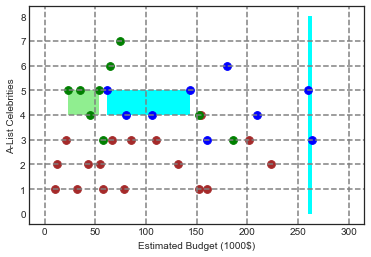

In [26]:
transaction_overlap_rules = qcba_transformation.overlap_pruner.transform(pruned_rules, default_class)

plotils.plot_quant_rules(transaction_overlap_rules)

In [27]:
pruned_rules

[CAR {a-list-celebrities=<1;2>} => {class=box-office-bomb} sup: 0.31 conf: 1.00 len: 2, id: 42,
 CAR {a-list-celebrities=<4;5>,estimated-budget=<62;143>} => {class=main-stream-hit} sup: 0.11 conf: 1.00 len: 3, id: 10,
 CAR {a-list-celebrities=<4;5>,estimated-budget=<23;54>} => {class=critical-success} sup: 0.11 conf: 1.00 len: 3, id: 24,
 CAR {estimated-budget=<260;264>} => {class=main-stream-hit} sup: 0.06 conf: 1.00 len: 2, id: 4]

## Range-based overlap pruning

In [28]:
def overlaps_with(self, other):
    return self.isin(other.minval) or self.isin(other.maxval) or other.isin(self.minval) or other.isin(self.maxval)

i1 = Interval(3, 5, True, True)
i2 = Interval(4, 4.5, True, True)

i3 = Interval(4, 6, True, True)
i4 = Interval(3, 4, True, True)

i5 = Interval(6, 7, True, True)

assert overlaps_with(i2, i1)
assert overlaps_with(i1, i2)

assert overlaps_with(i1, i3)
assert overlaps_with(i3, i1)

assert overlaps_with(i1, i4)
assert overlaps_with(i4, i1)

assert not overlaps_with(i1, i5)
assert not overlaps_with(i5, i1)

In [29]:
pruned_rules

[CAR {a-list-celebrities=<1;2>} => {class=box-office-bomb} sup: 0.31 conf: 1.00 len: 2, id: 42,
 CAR {a-list-celebrities=<4;5>,estimated-budget=<62;143>} => {class=main-stream-hit} sup: 0.11 conf: 1.00 len: 3, id: 10,
 CAR {a-list-celebrities=<4;5>,estimated-budget=<23;54>} => {class=critical-success} sup: 0.11 conf: 1.00 len: 3, id: 24,
 CAR {estimated-budget=<260;264>} => {class=main-stream-hit} sup: 0.06 conf: 1.00 len: 2, id: 4]

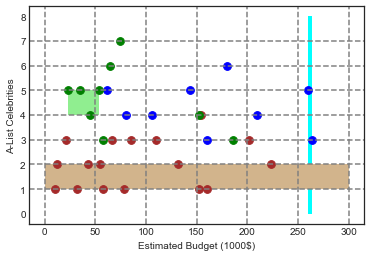

In [30]:
pruned_rules[0], pruned_rules[3] = pruned_rules[3], pruned_rules[0]
pruned_rules

transaction_overlap_rules = qcba_transformation.overlap_pruner.transform(pruned_rules, "main-stream-hit", transaction_based=False)

plotils.plot_quant_rules(transaction_overlap_rules)

# Single rules demonstration

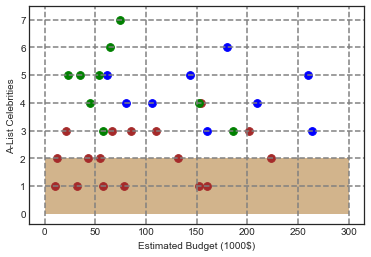

In [31]:
quant_rule1 = quant_rules[0]

plotils.plot_quant_rules([quant_rule1])

## Refitting

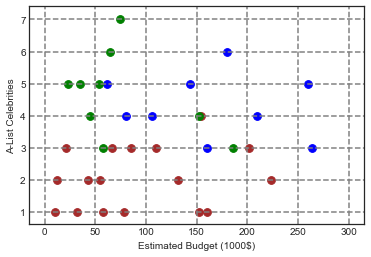

In [32]:
refitted_qrule1 = qcba_transformation.refitter.transform([quant_rule1])

# edit the maxval so that we can see the rule
#refitted_qrule1[0].antecedent[0][1].maxval=1.2

plotils.plot_quant_rules(refitted_qrule1)

## Literal pruning

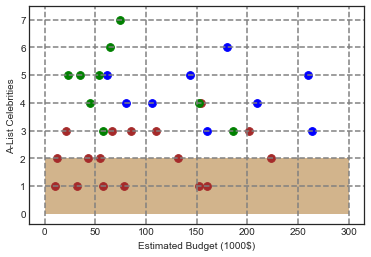

In [33]:
quant_rule1 = quant_rules[0]

plotils.plot_quant_rules([quant_rule1])

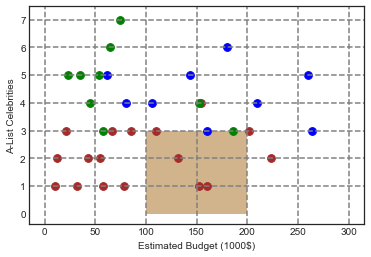

In [34]:
qrule_to_prune = quant_rule1.copy() 

# edit an item in antecedent to decrease confidence
# and see if the item gets pruned during literal pruning
# procedure
qrule_to_prune.antecedent[0] = "a-list-celebrities", Interval(0, 3, True, True)
qrule_to_prune.antecedent.append(("estimated-budget", Interval(100, 200, True, True)))

plotils.plot_quant_rules([qrule_to_prune])

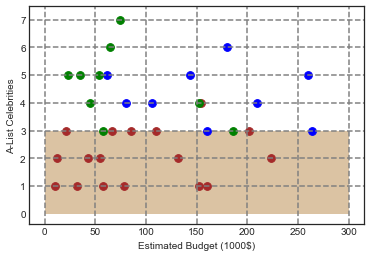

In [23]:
qrule1_literal_pruned = qcba_transformation.literal_pruner.transform([qrule_to_prune])


plotils.plot_quant_rules(qrule1_literal_pruned)

## Trimming

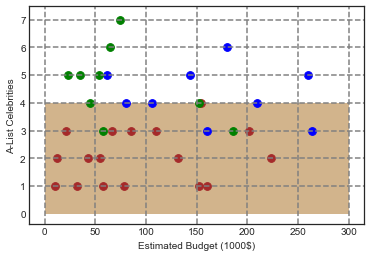

In [24]:
rule_to_trim = quant_rule1

rule_to_trim.antecedent[0] = "a-list-celebrities", Interval(0, 4, True, False)

plotils.plot_quant_rules([rule_to_trim])

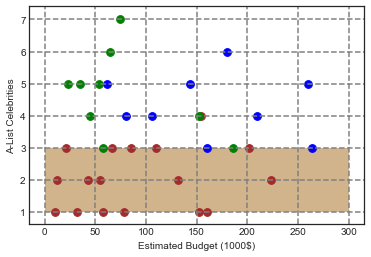

In [25]:
trimmed_rule = qcba_transformation.trimmer.transform([rule_to_trim])


plotils.plot_quant_rules(trimmed_rule)

## Extending

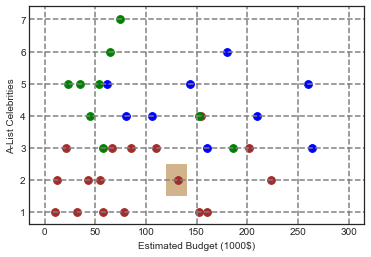

In [26]:
rule_to_extend = quant_rule1.copy()

rule_to_extend.antecedent = [
    ("a-list-celebrities", Interval(1.5, 2.5, True, True)),
    ("estimated-budget", Interval(120, 140, True, True))
]


plotils.plot_quant_rules([rule_to_extend])

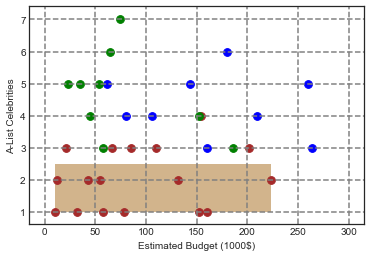

In [27]:
extended_rule = qcba_transformation.extender.transform([rule_to_extend])

plotils.plot_quant_rules(extended_rule)